<a href="https://colab.research.google.com/github/xDEVELYNNx/hand_gesture_recognition/blob/main/hand_gesture_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
from sklearn.preprocessing import LabelBinarizer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load data
data_test=pd.read_csv("https://raw.githubusercontent.com/VinitaSilaparasetty/hand-gesture-recognition/main/sign_mnist_test.csv")
data_train=pd.read_csv("/content/drive/MyDrive/sign_mnist_train.csv")

In [ ]:
data_test.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,...,131,134,144,147,125,87,87,103,107,110,116,113,75,74,74,74,76,74,82,134,168,155,146,137,145,146,149,135,124,125,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,138,137,137,138,138,139,137,142,140,138,139,137,137,136,135,134,133,134,132,129,132,134,135,135,137,139,139,139,140,141,...,114,112,89,48,133,194,182,185,184,184,182,181,172,174,177,178,178,179,181,183,187,175,165,154,118,107,100,75,96,83,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,152,157,163,168,171,182,172,175,185,183,184,185,185,185,183,183,182,181,178,86,88,93,96,108,125,137,145,149,154,160,...,145,123,78,162,239,227,229,226,226,225,224,222,89,91,94,111,136,154,167,184,125,3,166,225,195,188,172,185,161,122,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,209,208,207,207,209,208,210,210,207,209,209,208,209,210,209,207,208,209,207,206,208,209,208,208,210,211,210,211,209,209,...,85,80,84,151,238,255,255,250,237,245,250,232,103,101,102,103,95,208,231,227,209,190,179,182,152,150,159,119,83,63,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,203,204,204,204,203,202,198,216,217,135,181,200,195,194,193,190,189,187,185,190,194,196,197,200,202,204,206,207,207,206,...,93,52,24,53,63,33,41,51,48,45,49,55,149,150,150,148,147,151,124,82,84,81,69,81,111,103,84,75,53,28,26,40,64,48,29,46,49,46,46,53


In [ ]:
def show_img(img,df):
  label=data_test['label'][img]
  pixels=data_test.iloc[img,1:]
  pixels=np.array(pixels,dtype='uint8')
  pixels=pixels.reshape((28,28))

  plt.title('label is {label}'.format(label=label))
  plt.imshow(pixels,cmap='gray')
  plt.show()


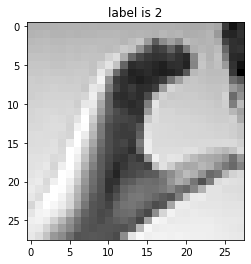

In [ ]:
show_img(20,data_test)

In [ ]:
#extract labels

y_train=data_train['label']
y_test=data_test['label']
del data_train['label']
del data_test['label']


In [ ]:
#label binarize

label_binarizer=LabelBinarizer()

y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

x_train = data_train.values
x_test = data_test.values


In [ ]:
#normalization

x_train = x_train/255
x_test = x_test/255


In [ ]:
#reshape

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)


In [ ]:
#data augmentation 

data_generator = ImageDataGenerator(
    featurewise_center = False,
    samplewise_center = False,
    featurewise_std_normalization = False,
    samplewise_std_normalization= False,
    zca_whitening =False,
    rotation_range= 10,
    zoom_range =0.1,
    width_shift_range = 0.1,
    height_shift_range =0.1,
    horizontal_flip = False,
    vertical_flip = False,
    )

In [ ]:
data_generator.fit(x_train)

In [ ]:
#build model 

model=Sequential()
model.add(Conv2D(75,(3,3), strides=1,padding='same',activation='relu',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2,padding='same'))
model.add(Conv2D(50,(3,3), strides=1,padding='same',activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2,padding='same'))
model.add(Conv2D(25,(3,3), strides=1,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2,padding='same'))
model.add(Flatten())
model.add(Dense(units=512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=24,activation='softmax'))


In [ ]:
#compile model 

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#set learning rate

learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy',patience=2,verbose=1,factor=0.5,min_lr=0.00001)


In [ ]:
#train model 

model.fit(data_generator.flow(x_train,y_train,batch_size=128),epochs=20,validation_data=(x_test,y_test),callbacks=[learning_rate_reduction])


Epoch 1/20
215/215 [==============================] - 42s 41ms/step - loss: 1.7750 - accuracy: 0.4735 - val_loss: 3.7966 - val_accuracy: 0.0721
Epoch 2/20
215/215 [==============================] - 8s 38ms/step - loss: 0.2599 - accuracy: 0.9169 - val_loss: 1.4457 - val_accuracy: 0.5163
Epoch 3/20
215/215 [==============================] - 8s 38ms/step - loss: 0.1087 - accuracy: 0.9654 - val_loss: 0.2863 - val_accuracy: 0.9076
Epoch 4/20
215/215 [==============================] - 8s 38ms/step - loss: 0.0659 - accuracy: 0.9804 - val_loss: 0.0580 - val_accuracy: 0.9780
Epoch 5/20
215/215 [==============================] - 8s 38ms/step - loss: 0.0421 - accuracy: 0.9868 - val_loss: 0.0322 - val_accuracy: 0.9897
Epoch 6/20
215/215 [==============================] - 8s 38ms/step - loss: 0.0311 - accuracy: 0.9900 - val_loss: 0.2826 - val_accuracy: 0.9059
Epoch 7/20
215/215 [==============================] - 8s 38ms/step - loss: 0.0375 - accuracy: 0.9877 - val_loss: 0.0877 - val_accuracy: 0.970

In [ ]:
#check final accuracy 

model.evaluate(x_test,y_test)


225/225 [==============================] - 1s 3ms/step - loss: 8.0349e-04 - accuracy: 1.0000


[0.0008034890051931143, 1.0]

In [ ]:
predictions= model.predict_classes(x_test)
for i in range(len(predictions)):
  if( predictions[i]>=9 or predictions[i]>=25):
    predictions[i]+=1
predictions[:10]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([ 6,  5, 10,  0,  3, 21, 10, 14,  3,  7])

In [ ]:
#save model 

#model.save('hand_gesture.h5')

In [ ]:
def show_img(img,df):
  pixels=data_test.iloc[img,0:]
  pixels=np.array(pixels,dtype='uint8')
  pixels=pixels.reshape((28,28))
  plt.title('testin img')
  plt.imshow(pixels,cmap='gray')
  plt.show()

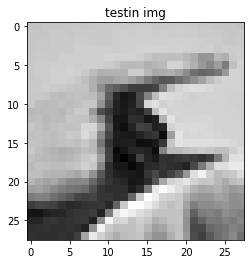


valeur de predictions :  6 


***********************************



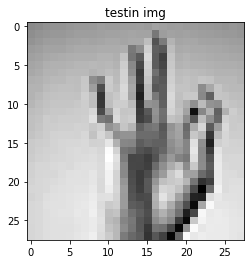


valeur de predictions :  5 


***********************************



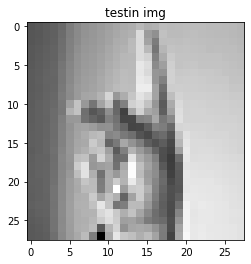


valeur de predictions :  10 


***********************************



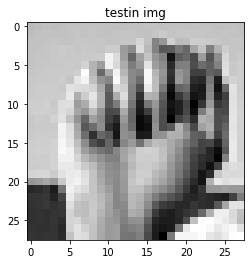


valeur de predictions :  0 


***********************************



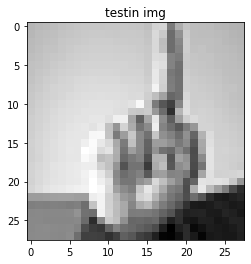


valeur de predictions :  3 


***********************************



In [ ]:
for i in [0, 1, 2, 3, 4]:
  show_img(i,data_test)
  print("\nvaleur de predictions : ",predictions[i],"\n")
  print("\n***********************************\n")